# Presentation in which we do some predictive modeling with _____ model/algorithm or whatever

STEPS
- Introduce the dataset
- Do basic EDA (distributions, make some cool graphs, maybe check for diff in means for teh periods, CLUSTERING!)
- Develop Predictive Model (try a few?)
- Defend our methods

In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as sms
import xgboost as xgb


## Describing The Dataset



Variables: 
- work_year (int)
- experience_level (str)
- employment_type (str)
- job_title (str)
- salary (int)
- salary_currency (str)
- salaryinusd (int)
- employee_residence (str)
- remote_ratio (int)
- company_location (str)
- company_size (str)


Target Variable: salary


In [150]:
# read in the data from ./data/presentation_nov_3.txt
df = pd.read_csv('data/presentation_nov_3/ds_salaries.csv')
#drop the first index column
df = df.drop(df.columns[0], axis=1)


In [151]:
#get the datatype of each column
df.dtypes


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [152]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [153]:
#convert the remote_ratio column to be categorical just so the eda is more readable

df['remote_ratio'] = df['remote_ratio'].replace([0, 50, 100], ['none', 'part', 'full'])
df['employment_type'] = df['employment_type'].replace(['FT', 'PT', 'CT', 'FL'], ['full_time', 'part_time', 'contract', 'freelance'])
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['entry_level', 'mid_level', 'senior_level', 'executive_level'])

df.head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,mid_level,full_time,Data Scientist,70000,EUR,79833,DE,none,DE,L
1,2020,senior_level,full_time,Machine Learning Scientist,260000,USD,260000,JP,none,JP,S
2,2020,senior_level,full_time,Big Data Engineer,85000,GBP,109024,GB,part,GB,M
3,2020,mid_level,full_time,Product Data Analyst,20000,USD,20000,HN,none,HN,S
4,2020,senior_level,full_time,Machine Learning Engineer,150000,USD,150000,US,part,US,L
5,2020,entry_level,full_time,Data Analyst,72000,USD,72000,US,full,US,L


In [154]:
# check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

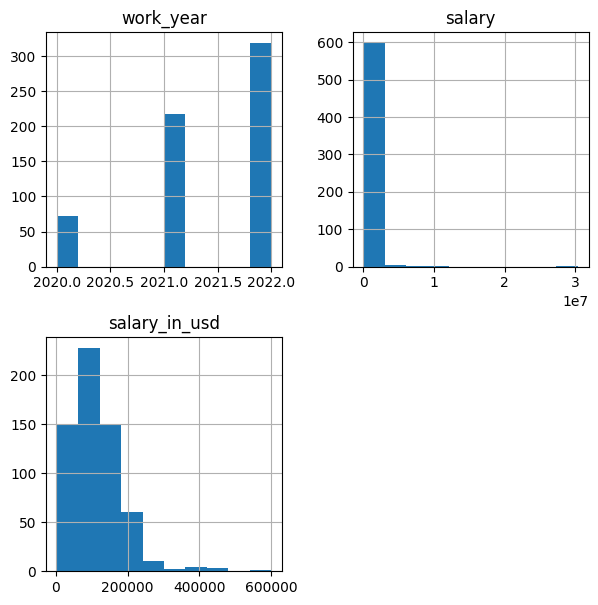

In [155]:
df.hist(figsize=(7,7))
plt.show()

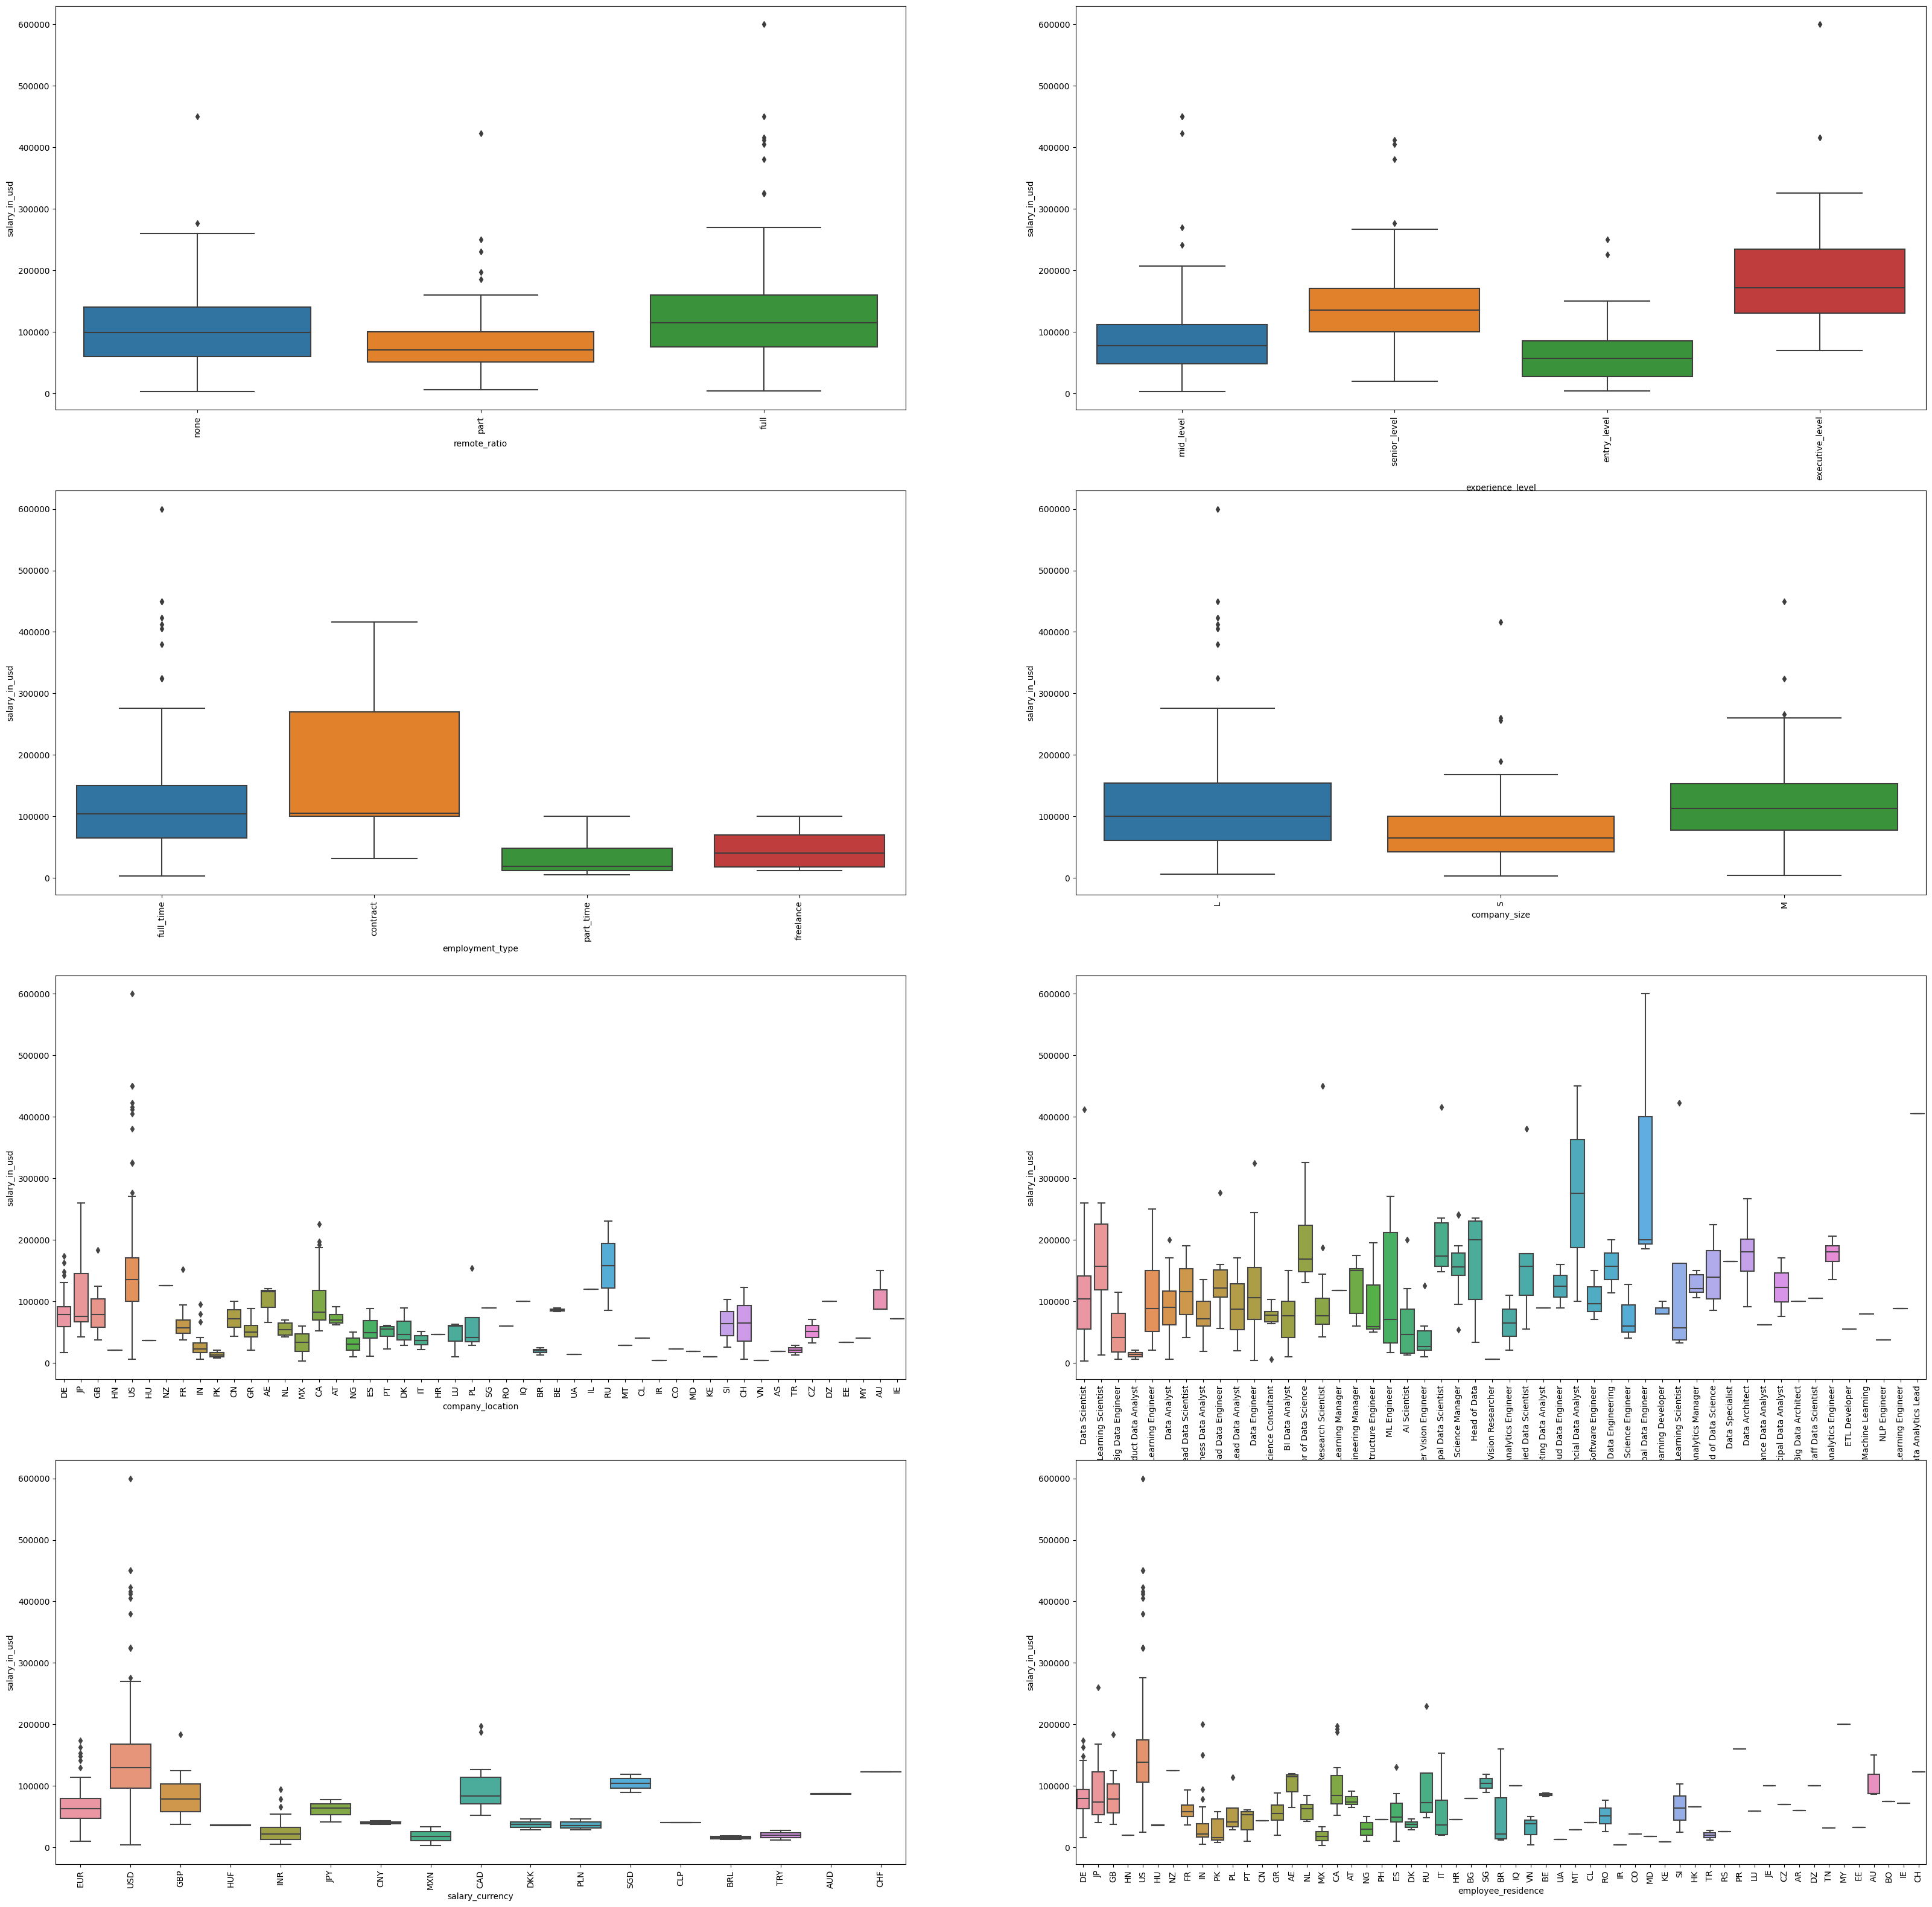

In [156]:
#boxplot of salary_in_usd by categorical variables
fig, ax = plt.subplots(4, 2, figsize=(40,40))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, ax=ax[0,0])
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=ax[0,1])
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, ax=ax[1,0])
sns.boxplot(x='company_size', y='salary_in_usd', data=df, ax=ax[1,1])
sns.boxplot(x='company_location', y='salary_in_usd', data=df, ax=ax[2,0])
sns.boxplot(x='job_title', y='salary_in_usd', data=df, ax=ax[2,1]) 
sns.boxplot(x='salary_currency', y='salary_in_usd', data=df, ax=ax[3,0])
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df, ax=ax[3,1])

#tilt the x axis labels
for i in range(4):
    for j in range(2):
        for tick in ax[i,j].get_xticklabels():
            tick.set_rotation(90)

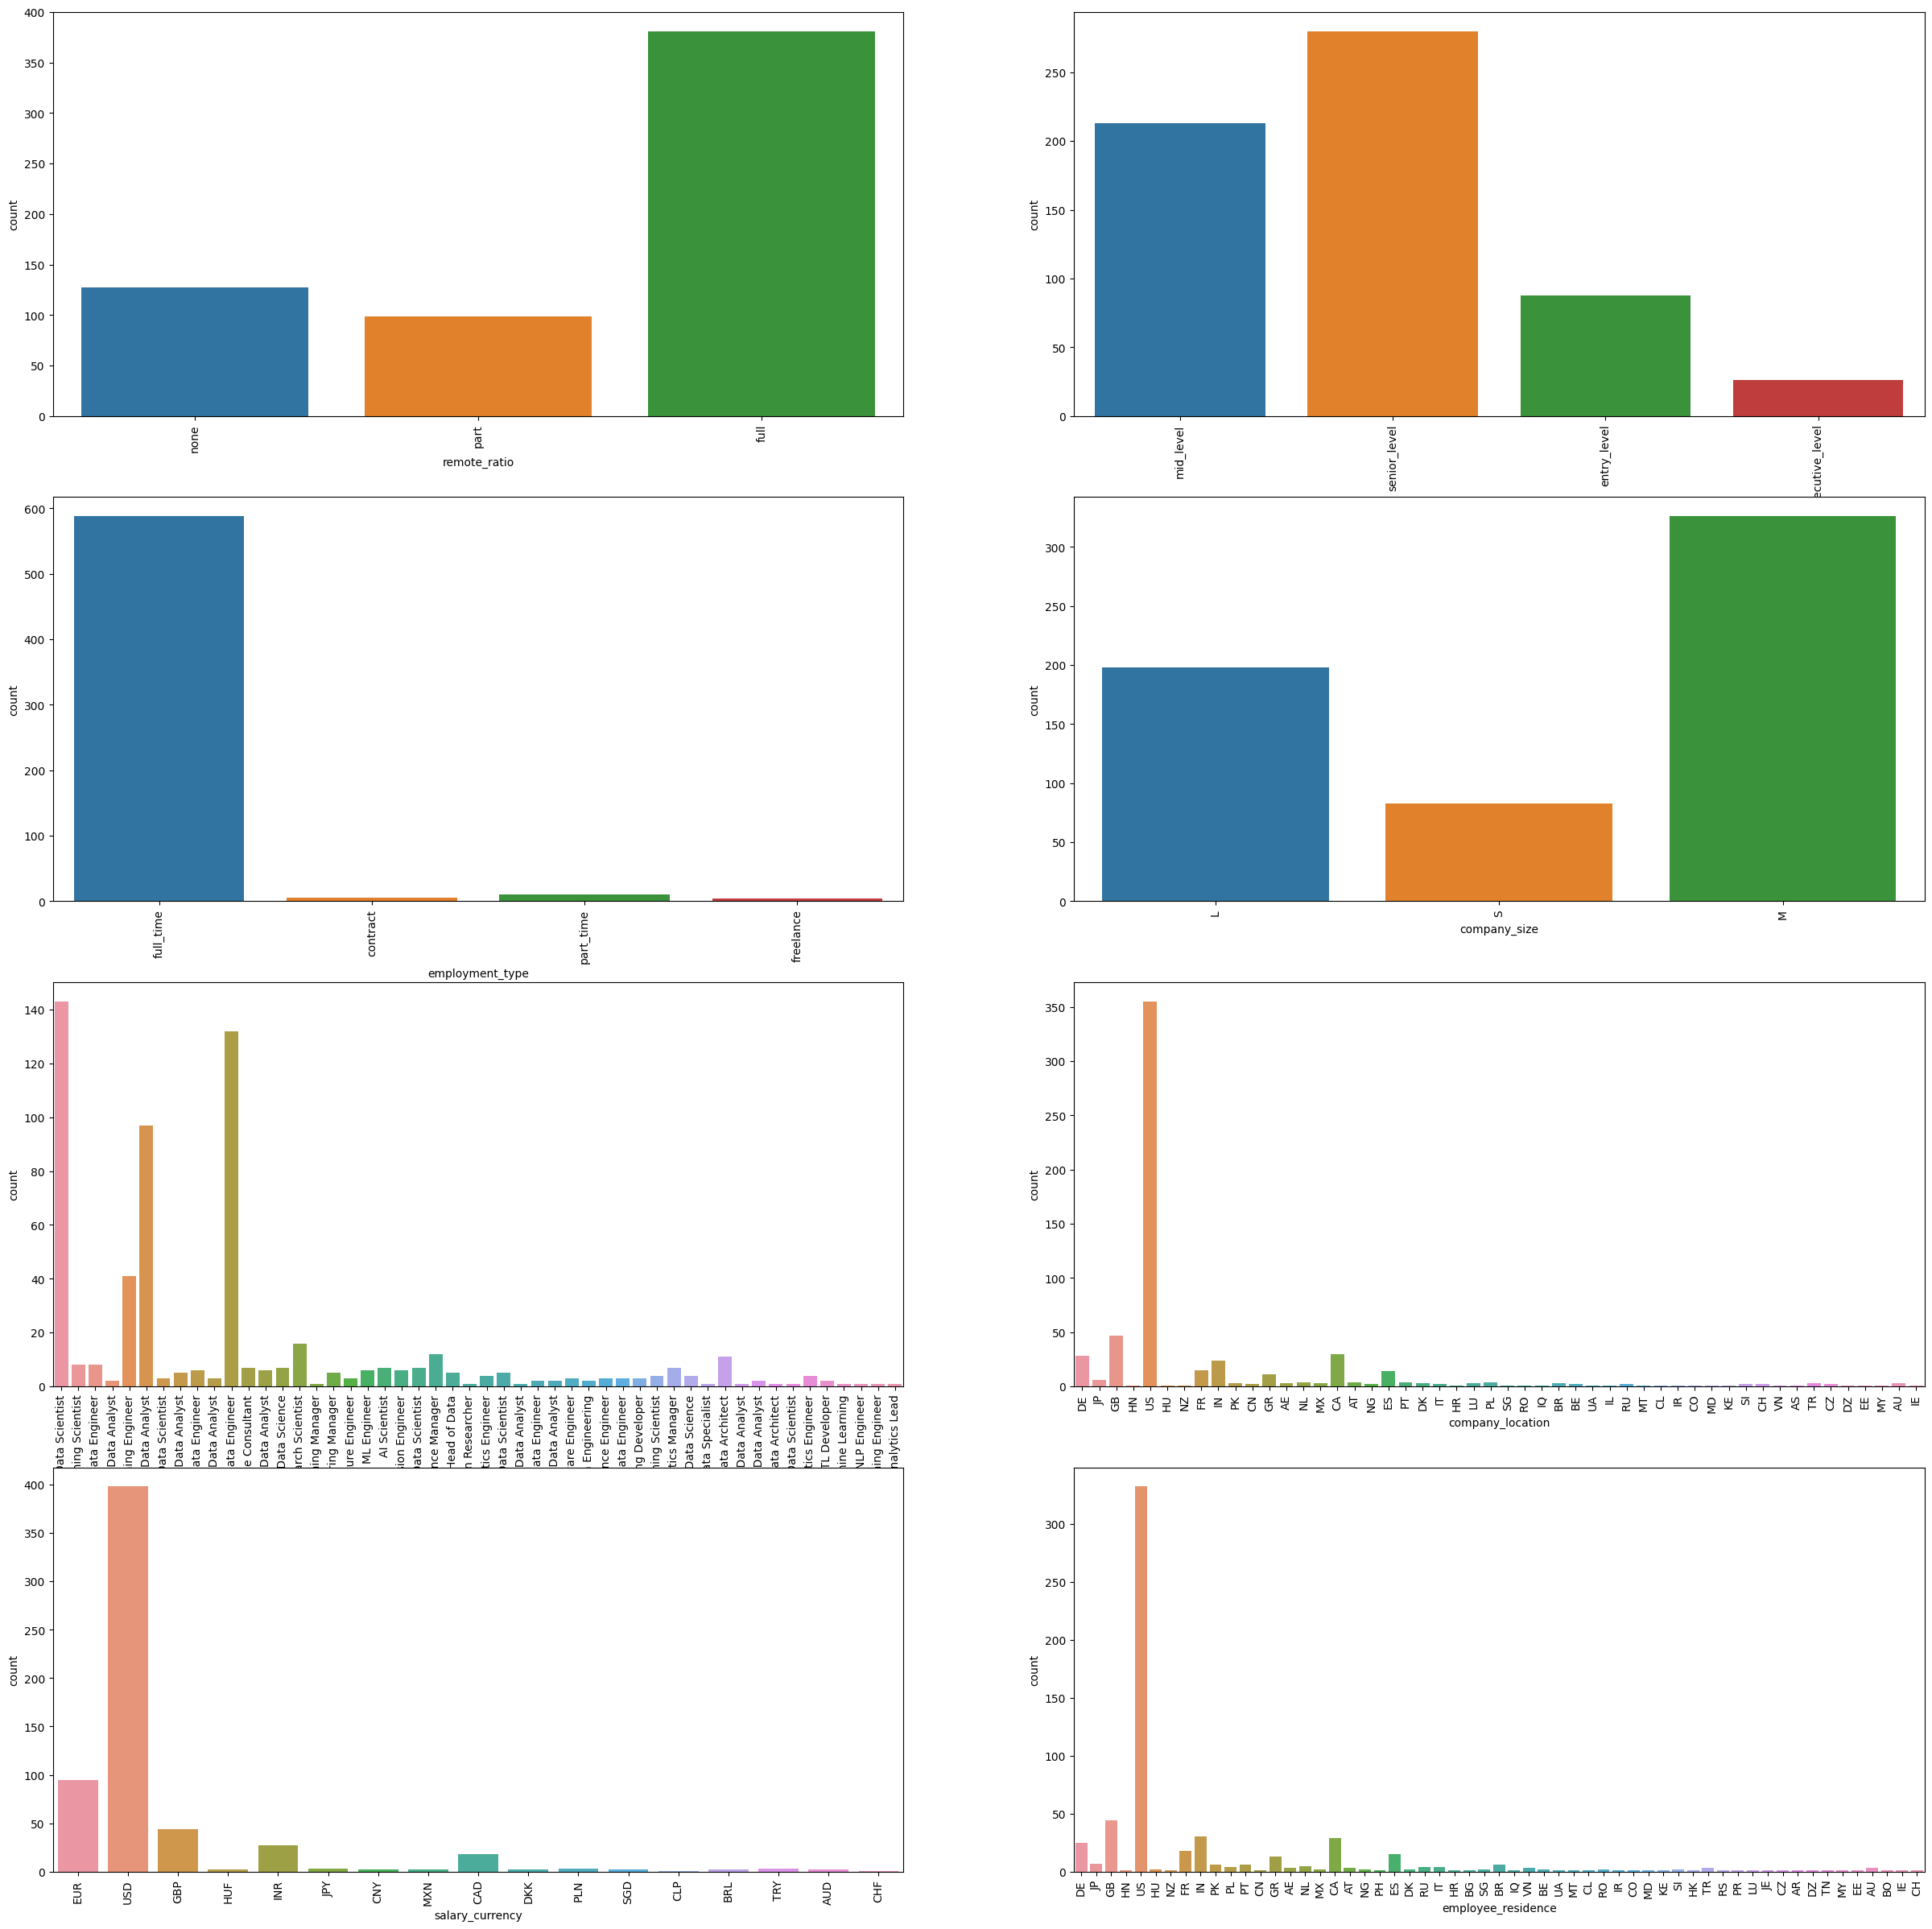

In [157]:
#show the ratio of each category in the categorical variables
fig, ax = plt.subplots(4, 2, figsize=(30,30))
sns.countplot(x='remote_ratio', data=df, ax=ax[0,0])
sns.countplot(x='experience_level', data=df, ax=ax[0,1])
sns.countplot(x='employment_type', data=df, ax=ax[1,0])
sns.countplot(x='company_size', data=df, ax=ax[1,1])
sns.countplot(x='job_title', data=df, ax=ax[2,0])
sns.countplot(x='company_location', data=df, ax=ax[2,1])
sns.countplot(x='salary_currency', data=df, ax=ax[3,0])
sns.countplot(x='employee_residence', data=df, ax=ax[3,1])


#tilt the x axis labels
for i in range(4):
    for j in range(2):
        for tick in ax[i,j].get_xticklabels():
            tick.set_rotation(90)

In [158]:
# show the top 5 most common job titles
df['job_title'].value_counts().head(5)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

In [159]:
# # use np.unique to convert the categorical variables to numerical variables
# numerical_df = df.copy()
# for col in df.columns:
#     numerical_df[col] = np.unique(df[col], return_inverse=True)[1]
# numerical_df.head(6)

In [160]:
# getting dummy variables for categorical variables for prediction



# Creating predictive models
1. XGBoost

In [173]:
def np_unique(df):
    numerical_df = df.copy()
    for col in df.columns:
        #if the column is not a numerical column
        if df[col].dtype != 'int64' and df[col].dtype != 'float64':
            numerical_df[col] = np.unique(df[col], return_inverse=True)[1]
    return numerical_df

In [174]:
def get_dummies(df):
    return pd.get_dummies(df)

In [175]:
# drop any rows with a variable that is less than 5% of the total data

def drop_minorities(df):
    for col in df.columns:
        if df[col].value_counts().min() < 0.05*len(df):
            df = df.drop(df[df[col] == df[col].value_counts().idxmin()].index)
    return df


In [176]:
# drop the outlier rows with salary_in_usd > 300000
def drop_outliers(df):
    for i in df.index:
        if df.loc[i, 'salary_in_usd'] > 300000:
            df = df.drop(i)
    df = df.reset_index(drop=True)
    return df
   

In [182]:
def drop_target_adjascent(df):
    for col in ['salary']:
        if col in df.columns:
            df = df.drop(col, axis=1)
    return df

In [183]:
def normalize(df):
    df = (df - df.mean()) / df.std()
    return df

In [185]:
dataset = df.copy()
#determine what preprocessing steps to take. You should always have np_unique or get_dummies as the first step, and if you're going to normalize, it should be the last step
processing_parameters = []
# processing_parameters.append(np_unique)
processing_parameters.append(get_dummies)
# processing_parameters.append(drop_target_adjascent)
# processing_parameters.append(drop_minorities)
# processing_parameters.append(drop_outliers)
# processing_parameters.append(normalize)

print("Before preprocessing: ", dataset.shape)

for step in processing_parameters:
    dataset = step(dataset)

print("After preproccessing", dataset.shape)

# #split the data into training and testing sets
X = dataset.drop('salary_in_usd', axis=1)
y = dataset['salary_in_usd']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #fit an xgboost model to the training data with early_stopping_rounds
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# #make predictions on the test data
predictions = xgb_model.predict(X_test)

# #calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error: " + str(mae))

# #calculate the R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(predictions, y_test)
print("R^2 Score: " + str(r2))


Before preprocessing:  (607, 11)
After preproccessing (607, 191)
Mean Absolute Error: 2626.047655449539
R^2 Score: 0.9735322384046183
